In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import trapezoid, simpson, romberg, quad
from sympy import lambdify, integrate

# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Isaac Villada
*Métodos computacionales 2024-II*

---

#1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

Integral f trapezoidal: 2.2151169492722045
Integral f Simpson: 2.2151169295517463
Integral f cuadratura: 2.215116913771584
Integral g trapezoidal: 0.015525950437859409
Integral g Simpson: 0.015525923530898858
Integral g cuadratura: 0.015525920651619316
integral h trapezoidal 0.30842513753404244
integral h simpson 0.30842513753404244
integral h cuadratura 0.30842513753404244


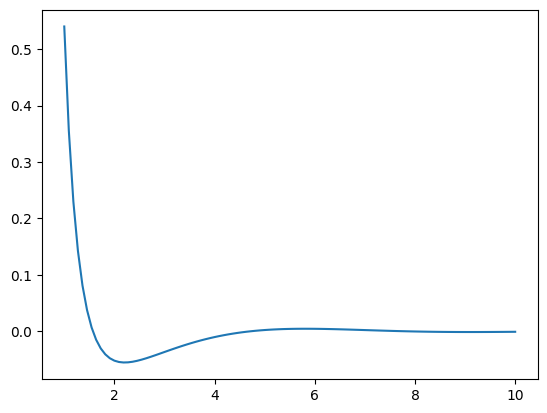

In [ ]:
a,b = 1e-5,np.pi/2
c,d = 1,6
e,ff = 0,np.pi/4

f = lambda x : 1 / np.sqrt(np.tan(x))
g = lambda x : np.cos(x) / x**3

def integral_trapezoidal(f, a, b) :

  i = 1
  i_i = 0
  e = 1e-5
  n = 2
  integrales = [0]
  integral_trapezoidal = 0

  while i >= e :

    x = np.linspace(a,b, n)

    integral_trapezoidal = trapezoid(f(x), x)
    i = abs(integral_trapezoidal - integrales[i_i - 1])
    n = 3*n
    integrales.append(integral_trapezoidal)
    i_i += 1

  return integral_trapezoidal

def integral_simpson(f, a, b) :

  def simpson13(f, a, b, n):

    h = (b - a) / n
    integral = (f(a) + f(b))
    # Suma de los términos impares
    for i in range(1, n, 2):
      x_i = a + i * h
      integral += 4 * f(x_i)
    # Suma de los términos pares
    for i in range(2, n, 2):
      x_i = a + i * h
      integral += 2 * f(x_i)
    return integral * h/3

  i = 1
  i_i = 0
  e = 1e-5
  n = 2
  integrales = [0]
  integral_simpson = 0

  while i >= e :

    x = np.linspace(a,b, n)

    integral_simpson = simpson13(f, a, b, n)
    i = abs(integral_simpson - integrales[i_i - 1])
    n = 2*n
    integrales.append(integral_simpson)
    i_i += 1

  return integral_simpson

def integral_cuadratura(f, a, b) :

  i = 1
  i_i = 0
  e = 1e-5
  n = 2
  integrales = [0]
  integral_cuadratura = 0

  while i >= e :

    x = np.linspace(a,b, n)

    integral_cuadratura, error = quad(f, a, b)
    i = abs(integral_cuadratura - integrales[i_i - 1])
    n = 3*n
    integrales.append(integral_cuadratura)
    i_i += 1

  return integral_cuadratura




integral_trapezoidal_f = integral_trapezoidal(f, a, b)
integral_simpson_f = integral_simpson(f, a, b)
integral_cuadratura_f = integral_cuadratura(f, a, b)

integral_trapezoidal_g = integral_trapezoidal(g, c, d)
integral_simpson_g = integral_simpson(g, c, d)
integral_cuadratura_g = integral_cuadratura(g, c, d)



x = np.linspace(1, 10, 100)

plt.plot(x, g(x))


print("Integral f trapezoidal:", integral_trapezoidal_f)
print("Integral f Simpson:", integral_simpson_f)
print("Integral f cuadratura:", integral_cuadratura_f)

print("Integral g trapezoidal:", integral_trapezoidal_g)
print("Integral g Simpson:", integral_simpson_g)
print("Integral g cuadratura:", integral_cuadratura_g)

x = sp.symbols('x')
y = sp.symbols('y')

h = 1 / sp.sqrt(1 - y**2)
a = 0
b = sp.sin(y)

integral_ex = integrate(h, (y, a, b))
integral_ex = lambdify(y, integral_ex, 'numpy')

integral_h_trapezoidal = integral_trapezoidal(integral_ex, e,ff)
integral_h_simpson = integral_simpson(integral_ex, e,ff)
integral_h_cuadratura = integral_cuadratura(integral_ex, e,ff)

print('integral h trapezoidal', integral_h_trapezoidal)
print('integral h simpson', integral_h_simpson)
print('integral h cuadratura', integral_h_cuadratura)

#2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.

* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.



Trabajo realizado  116666.66666666667 J


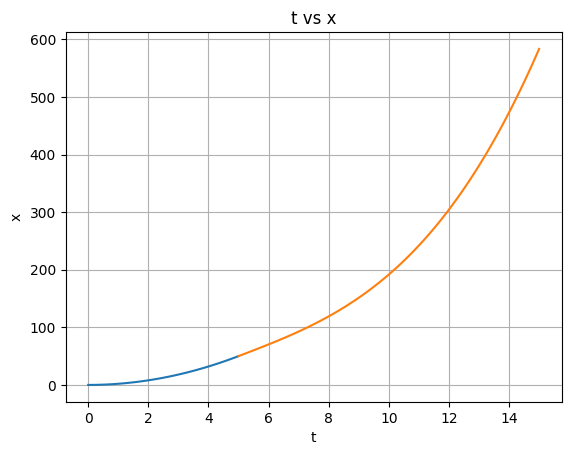

In [ ]:
a, b = 0, 5
c, d = 5, 15

f = 200

t_1 = np.linspace(0,5,100)
t_2 = np.linspace(5,15,100)

t = sp.symbols('t')

v_x1 = 4*t
v_x2 = 20 + (5-t)**2

x_1 = integrate(v_x1, t)
x_2 = integrate(v_x2, (t, b, t))

x_1 = lambdify(t, x_1, 'numpy')
x_2 = lambdify(t, x_2, 'numpy')

w = f * (x_1(b) + x_2(d))
print("Trabajo realizado ", w, "J")

plt.plot(t_1, x_1(t_1))
plt.plot(t_2, x_2(t_2) + x_1(5))
plt.title("t vs x")
plt.ylabel(x)
plt.xlabel(t)
plt.grid(True)

#4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [57]:
m = 1
g = 9.8
l = 1
i = 1
theta_0 = np.pi/3
p_0 = 2*np.pi * np.sqrt((i/(m*g*l)))
k = np.sin(theta_0 / 2)

p = lambda phi : 1 / np.sqrt((1 - k**2 * np.sin(phi)**2))

i, error =  quad(p, 0, np.pi/2)


print("Período : ", i * 2*p_0/np.pi, "s")

Período :  2.1539727922602028 s


#5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm. Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.


In [56]:
f = lambda t : 22.8 / (3.5 + 7*(t - 1.25)**4)

autos, error = quad(f, 0, 2)

print('la cantidad aproximada de autos es de', autos, 'y El error porcentual es del ', error/100, '%')

# El método quad trae consigo un error, esto lo hace calculando la integral con dos métodos diferentes, sencillamente se divide entre 100 y se encuentra el error porcentual

la cantidad aproximada de autos es de 9.991854348486756 y El error porcentual es del  2.9019745796925874e-12 %


#6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ0∕4π$ = 1, calcular y graficar:

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


<ipython-input-59-531b0d2a5e4b>:18: RuntimeWarning: invalid value encountered in scalar divide
  A_phi_val *= ((2 - k) * kk - 2 * E) / k


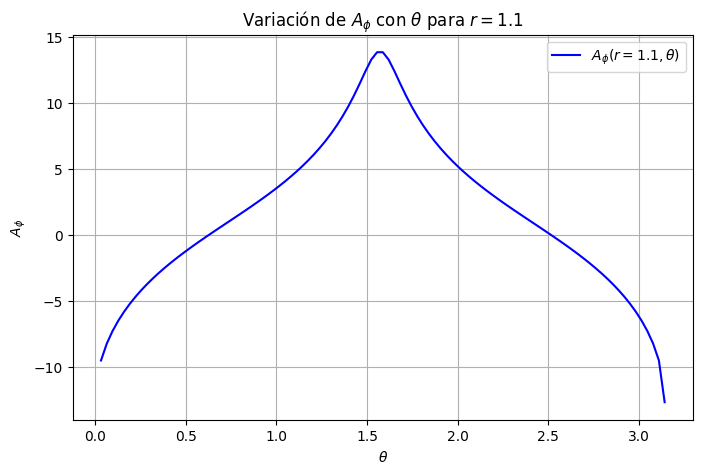

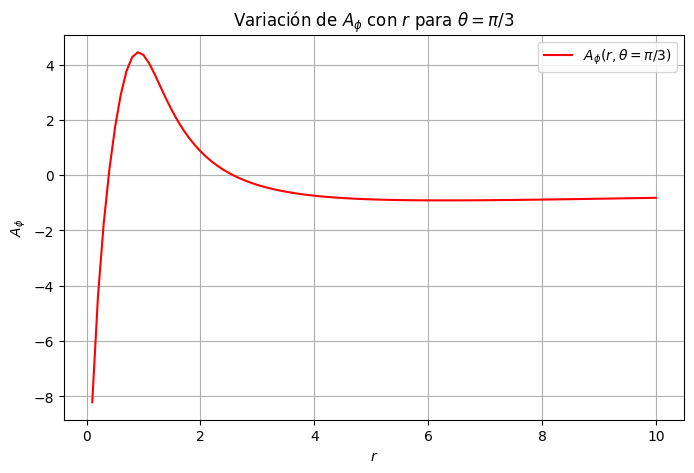

In [59]:
a = 1
I = 3

def A_phi(r, theta):
    k2 = (4 * a * r * np.sin(theta)) / (a**2 + r**2 + 2 * a * r * np.sin(theta))
    k = np.sqrt(k2)


    k_fun = lambda phi: 1 / np.sqrt(1 - k**2 * np.sin(phi)**2)
    E_fun = lambda phi: np.sqrt(1 - k**2 * np.sin(phi)**2)


    kk, _ = quad(k_fun, 0, np.pi / 2)
    E, _ = quad(E_fun, 0, np.pi / 2)


    A_phi_val = (4 * I * a) / np.sqrt(a**2 + r**2 + 2 * a * r * np.sin(theta))
    A_phi_val *= ((2 - k) * kk - 2 * E) / k

    return A_phi_val


theta_vals = np.linspace(0, np.pi, 100)
A_vals_theta = [A_phi(1.1, theta) for theta in theta_vals]

plt.figure(figsize=(8, 5))
plt.plot(theta_vals, A_vals_theta, label=r"$A_\phi (r=1.1, \theta)$", color='b')
plt.xlabel(r"$\theta$")
plt.ylabel(r"$A_\phi$")
plt.title(r"Variación de $A_\phi$ con $\theta$ para $r=1.1$")
plt.legend()
plt.grid()
plt.show()


r_vals = np.linspace(0.1, 10, 100)
A_vals_r = [A_phi(r, np.pi / 3) for r in r_vals]

plt.figure(figsize=(8, 5))
plt.plot(r_vals, A_vals_r, label=r"$A_\phi (r, \theta=\pi/3)$", color='r')
plt.xlabel(r"$r$")
plt.ylabel(r"$A_\phi$")
plt.title(r"Variación de $A_\phi$ con $r$ para $\theta=\pi/3$")
plt.legend()
plt.grid()
plt.show()